In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson
import numpy as np
import math
import random

df = pd.read_csv('output.csv')
## Data Cleaning : 
df['Value'] = df['Value'].str.rstrip(' ETH')
df['Value'] = df['Value'].apply(lambda x: float(x.rstrip(' wei')) *10**-18 if x.endswith('wei') else (x))

df['Value'] = df['Value'].astype(float)
df['Value'] = df['Value'].replace(0.0, 10**-18)
df['Value'] = df['Value'].replace(0, 10**-18)

df['Txn Fee'] = df['Txn Fee'].astype(float)

df = df.drop_duplicates(subset='Hash', keep='first')
df.to_csv('output_cleaned_epsilon.csv', index=False)

We've already extracted the data from the website, but it still needs to be cleaned up. Firstly, we need to eliminate any extraneous information, such as 'ETH' from the 'value' column. Additionally, due to dynamic data loading, we must remove any duplicate rows. Once this is accomplished, we'll be good to go!

Value - Mean: 0.4429613353563692, Standard Deviation: 5.118537271456196
Txn Fee - Mean: 0.006326284373388345, Standard Deviation: 0.03817592629810732


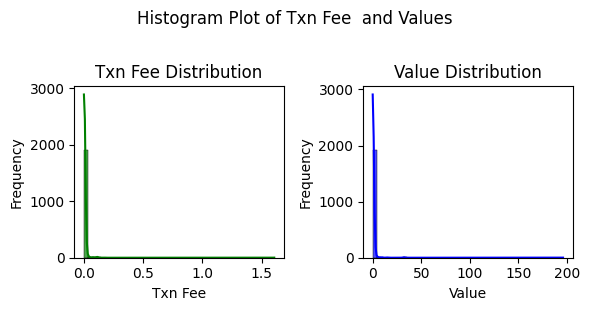

In [54]:
mean_value = df['Value'].mean()
std_value = df['Value'].std()

df['Value'].to_csv("value.csv")
df['Txn Fee'].to_csv("TxnFee.csv")
mean_txn_fee = df['Txn Fee'].mean()
std_txn_fee = df['Txn Fee'].std()

print(f"Value - Mean: {mean_value}, Standard Deviation: {std_value}")
print(f"Txn Fee - Mean: {mean_txn_fee}, Standard Deviation: {std_txn_fee}")


# num_bins_sturges = int(1 + math.log2(len(df['Value'])))


plt.figure(figsize=(6, 3))
plt.suptitle('Histogram Plot of Txn Fee  and Values', y=1.02) 

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

When dealing with a small set of data (less than 30 points), it's better to use a simpler approach for determining the bin size in a histogram. Instead of using the Sturges formula, which may not work well with such a small dataset, we opted for the square root rule. This choice helps in creating a histogram that effectively represents the continuity of the data, especially considering the limited number of data points and the relatively low values in our dataset.

The standard deviation was found to be higher than the mean, indicating a notable degree of variability within our dataset. This suggests that our data points are quite spread out from the average.


To delve deeper into our investigation, we employ the computation of skewness and kurtosis. Skewness is determined through the third central moment, while kurtosis is assessed using the fourth central moment.

In [55]:
from scipy.stats import skew, kurtosis

skewness_value = skew(df['Value'])
kurtosis_value = kurtosis(df['Value'])

print(f"Value Skewness: {skewness_value}")
print(f"Value Kurtosis: {kurtosis_value}")

skewness_value = skew(df['Txn Fee'])
kurtosis_value = kurtosis(df['Txn Fee'])

print(f"Txn FeeSkewness  : {skewness_value}")
print(f"Txn Fee Kurtosis: {kurtosis_value}")

Value Skewness: 30.954918843476335
Value Kurtosis: 1121.6957076096298
Txn FeeSkewness  : 38.30979714639741
Txn Fee Kurtosis: 1596.0740620151823


The skewness, representing the 3rd central moment, positive indicates a right-skewed distribution characterized by a moderate tail on the right side. Concurrently, the negative kurtosis, denoting the 4th central moment, implies a distribution with a less peaked and lighter tails than a normal distribution. The fact that the kurtosis is less than zero signifies that the distribution has thinner tails compared to a normal distribution.

The x-axis of the distribution of transaction fees is set to logarithmic scale, which helps in visualizing the distribution of transaction fees more effectively.

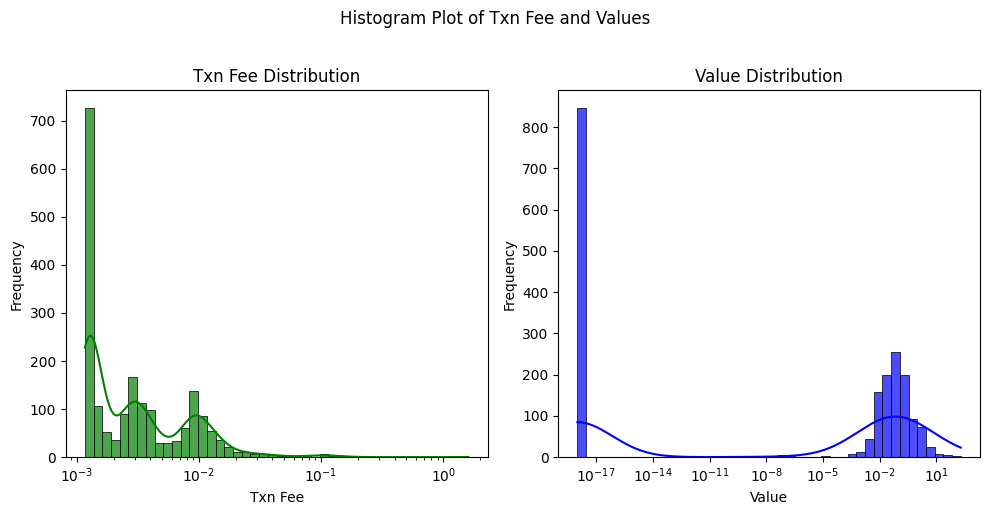

In [56]:
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram Plot of Txn Fee and Values', y=1.02) 

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# plt.xlim(0,df['Value'].mean()) 
plt.xscale('log')
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


As it currently stands from the subplots, the majority of transactions fall within the value range of 0 to 0.05. The reason for this is that most of the transactions involve coin swaps. In other words, individuals involved in the transactions are simply exchanging one coin for another within the same network, or in some cases, using coins to unlock transactions (especially when gaining "Meme Coins"). It is important to note, however, that this does not justify the high frequency of Txn Fee at $10^{-17}$ or lower, as some of the transactions with zero value have significantly larger Txn fees.


The following plot we have is based on the data after we removed the rows with very small values. This was done in order to exclude the coin-swap transactions and coin submittions. The x-axis of the distribution of transaction fees is set to logarithmic scale

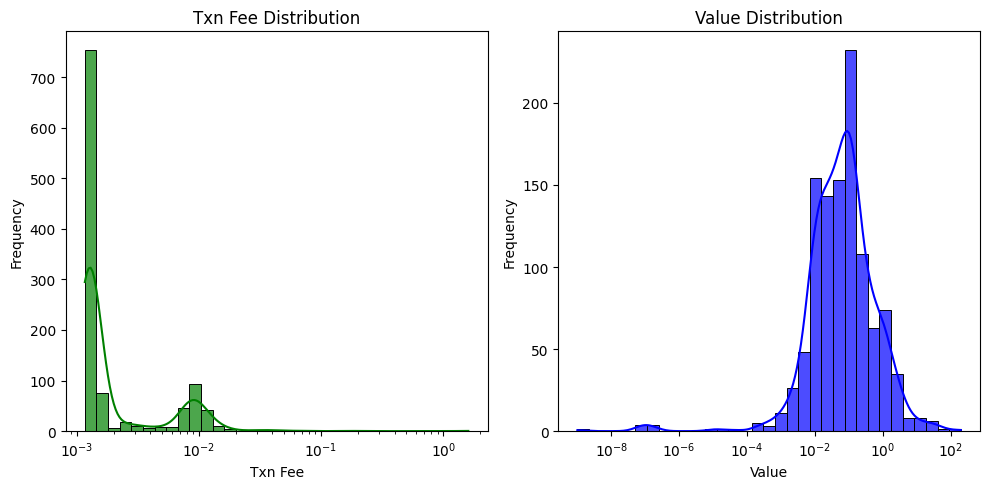

In [57]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(non_zero_df['Txn Fee'], bins=int(math.sqrt(len(non_zero_df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.xscale('log')
sns.histplot(non_zero_df['Value'], bins=int(math.sqrt(len(non_zero_df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now, we're going to take a sample from the filtered data with two ways:

In [58]:
non_zero_df = df[df['Value'] > 10**-15]
df = non_zero_df
# non_zero_df.to_csv("non-zero_output.csv")

1. Simple Random Sampling (SRS) : Here, we choose 20 percent of population as the size of our sample

In [59]:
SAMPLE_PERCENTAGE = 20
sample_size = len(df) * SAMPLE_PERCENTAGE // 100
df_srs = df.sample(n = sample_size, random_state=random.randint(1, 10000000))

2. Stratified Sampling: Here, we choose block to stratify the data because it will classify the data in the best way possible (for this data we have). Factors like time is a little bit misleading because the data is loaded dynamically.




In [60]:
def sample_from_each_group(group):
    return group.sample(frac=0.2, random_state = random.randint(1, 1000000))

df_ss = df.groupby('Block').apply(sample_from_each_group)


C:\Users\Ali\AppData\Local\Temp\ipykernel_7068\2187408212.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ss = df.groupby('Block').apply(sample_from_each_group)


In both cases, we choose a random number from 1 to 1000000 for random_state, which is the seed.

First, let's compare the mean and std value of population, Simple Random Sample, and Stratified Sample:

In [61]:
print(f"Txn Fee mean of Population is {df['Txn Fee'].mean()}")
print(f"Value mean of Population is {df['Value'].mean()}")
print(f"Txn Fee mean of Simple Random Sample is {df_srs['Txn Fee'].mean()}")
print(f"Value mean of Simple Random Sample is {df_srs['Value'].mean()}")
print(f"Txn Fee mean of Stratified Sample is {df_ss['Txn Fee'].mean()}")
print(f"Value mean of Stratified Sample is {df_ss['Value'].mean()}")
print("--------------")
print(f"Txn Fee std of Population is {df['Txn Fee'].std()}")
print(f"Value std of Population is {df['Value'].std()}")
print(f"Txn Fee std of Simple Random Sample is {df_srs['Txn Fee'].std()}")
print(f"Value std of Simple Random Sample is {df_srs['Value'].std()}")
print(f"Txn Fee std of Stratified Sample is {df_ss['Txn Fee'].std()}")
print(f"Value std of Stratified Sample is {df_ss['Value'].std()}")

Txn Fee mean of Population is 0.004831320522456462
Value mean of Population is 0.787261255046746
Txn Fee mean of Simple Random Sample is 0.010740779908256882
Value mean of Simple Random Sample is 0.8961020371788991
Txn Fee mean of Stratified Sample is 0.010415503119266057
Value mean of Stratified Sample is 0.6384581023669724
--------------
Txn Fee std of Population is 0.0490813004810927
Value std of Population is 6.805203313016304
Txn Fee std of Simple Random Sample is 0.10885823599432433
Value std of Simple Random Sample is 5.586900505004892
Txn Fee std of Stratified Sample is 0.10873575568373108
Value std of Stratified Sample is 4.990362829772268


Now, we're going to compare samples with population. The plots should be on a same x-axis.

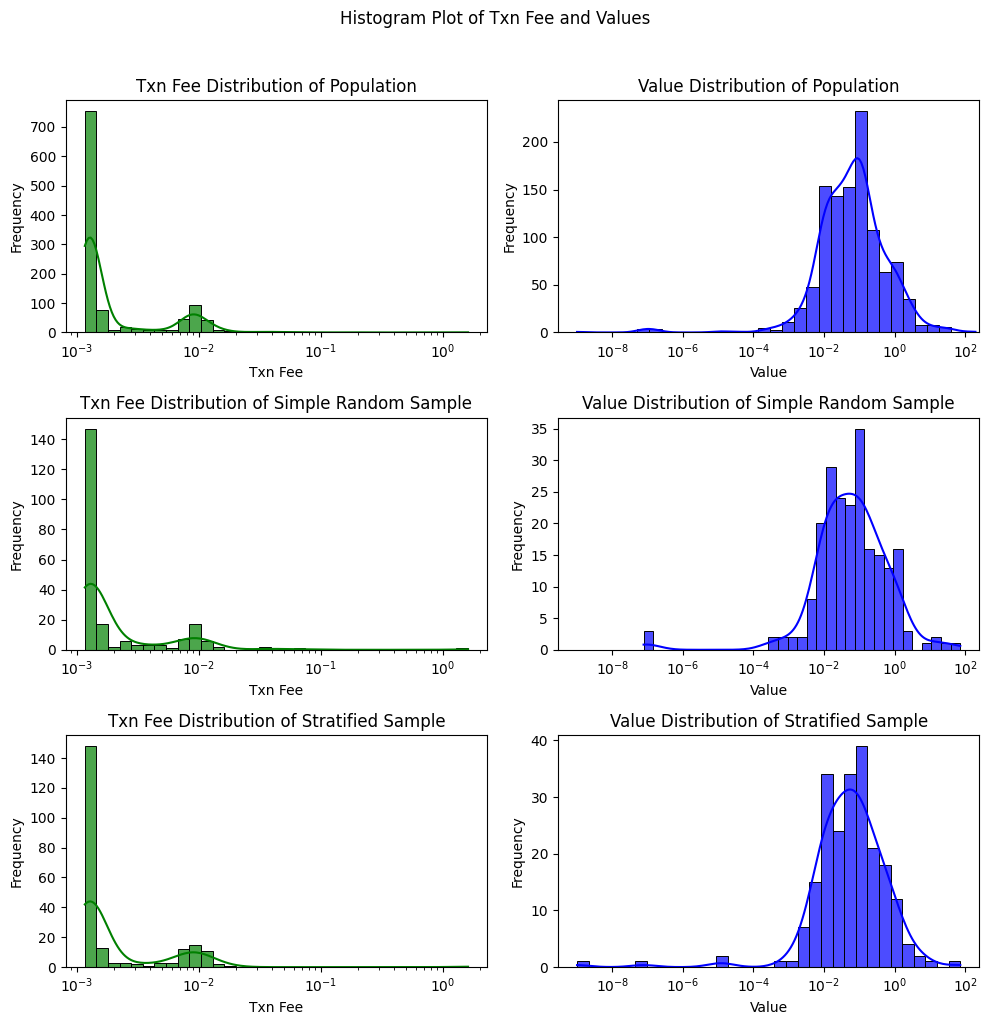

In [62]:
plt.figure(figsize=(10, 10))
plt.suptitle('Histogram Plot of Txn Fee and Values', y=1.02) 


plt.subplot(3, 2, 1)
plt.xscale('log')
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Population')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')


plt.subplot(3, 2, 2)
plt.xscale('log')
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Population')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(3, 2, 3)
plt.xscale('log')
sns.histplot(df_srs['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Simple Random Sample')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.xscale('log')
sns.histplot(df_srs['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Simple Random Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.xscale('log')
sns.histplot(df_ss['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Stratified Sample')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
plt.xscale('log')
sns.histplot(df_ss['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Stratified Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')

xlim = plt.gca().get_xlim()
for i in range(2, 7, 2):
    plt.subplot(3, 2,  i)
    plt.xlim(xlim[0], xlim[1])

plt.tight_layout()
plt.show()